# Análise e Organização de Dados do Airbnb - Rio de Janeiro 🏘️🏖️

## 📋 Objetivo do Projeto
Este projeto tem como objetivo realizar uma análise completa dos dados do Airbnb no Rio de Janeiro, incluindo:
- **Preparação dos Dados**: Importação e merge de datasets
- **Tratamento de Valores Ausentes**: Identificação e preenchimento de dados faltantes
- **Detecção e Tratamento de Outliers**: Remoção de valores extremos
- **Transformação de Dados Categóricos**: Conversão para formato numérico

## 📊 Datasets Utilizados
1. **listings_cleaned.csv**: Informações sobre propriedades (localização, tipo, preço, acomodações)
2. **reviews.csv**: Avaliações e notas dos hóspedes

---

## 🛠️ Tecnologias Utilizadas
- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn


In [20]:
# ====================================================================
# IMPORTAÇÃO DE BIBLIOTECAS
# ====================================================================

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10

# Ignorar warnings desnecessários
import warnings
warnings.filterwarnings("ignore")

print("✅ Bibliotecas importadas com sucesso!")
print(f"📦 Versão Pandas: {pd.__version__}")
print(f"📦 Versão NumPy: {np.__version__}")


✅ Bibliotecas importadas com sucesso!
📦 Versão Pandas: 2.3.3
📦 Versão NumPy: 2.3.3


---

# 1️⃣ PREPARAÇÃO DOS DADOS (25 pontos)

Nesta etapa, vamos:
1. Importar os arquivos CSV usando `pandas`
2. Verificar as primeiras linhas de cada DataFrame
3. Analisar tipos de dados e informações gerais
4. Realizar o merge entre os DataFrames usando a coluna `id`

---


In [21]:
# ====================================================================
# 1.1 IMPORTAÇÃO DOS DATASETS
# ====================================================================

# Definir caminho da pasta de dados
data_path = r"C:\Users\bianc\OneDrive\Documents\2-Projetos\06_Organizing_and_Analyzing_Airbnb_Data\Organizing_and_analyzing_Airbnb_data\data"

In [22]:
data_path + "\\listings_cleaned.csv"

'C:\\Users\\bianc\\OneDrive\\Documents\\2-Projetos\\06_Organizing_and_Analyzing_Airbnb_Data\\Organizing_and_analyzing_Airbnb_data\\data\\listings_cleaned.csv'

In [23]:
data_path + "\\reviews.csv"

'C:\\Users\\bianc\\OneDrive\\Documents\\2-Projetos\\06_Organizing_and_Analyzing_Airbnb_Data\\Organizing_and_analyzing_Airbnb_data\\data\\reviews.csv'

In [24]:
# Importar datasets
listings = pd.read_csv(f"{data_path}\\listings_cleaned.csv")
reviews = pd.read_csv(f"{data_path}\\reviews.csv")

print("=" * 70)
print("📂 DATASETS IMPORTADOS COM SUCESSO!")
print("=" * 70)
print(f"\n📊 Dimensões do dataset "listings": {listings.shape[0]} linhas x {listings.shape[1]} colunas")
print(f"📊 Dimensões do dataset "reviews": {reviews.shape[0]} linhas x {reviews.shape[1]} colunas")
print("\n" + "=" * 70)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (689432872.py, line 8)

In [ ]:
# ====================================================================
# 1.2 VISUALIZAÇÃO DAS PRIMEIRAS LINHAS
# ====================================================================

print("=" * 70)
print("🏠 PRIMEIRAS 5 LINHAS - DATASET LISTINGS")
print("=" * 70)
display(listings.head())

print("\n" + "=" * 70)
print("⭐ PRIMEIRAS 5 LINHAS - DATASET REVIEWS")
print("=" * 70)
display(reviews.head())


🏠 PRIMEIRAS 5 LINHAS - DATASET LISTINGS


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0



⭐ PRIMEIRAS 5 LINHAS - DATASET REVIEWS


,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [ ]:
# ====================================================================
# 1.3 INFORMAÇÕES GERAIS DOS DATASETS
# ====================================================================

print("=" * 70)
print("📋 INFORMAÇÕES DO DATASET LISTINGS")
print("=" * 70)
listings.info()

print("\n" + "=" * 70)
print("📋 INFORMAÇÕES DO DATASET REVIEWS")
print("=" * 70)
reviews.info()


📋 INFORMAÇÕES DO DATASET LISTINGS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39499 non-null  int64  
 1   neighbourhood_cleansed  39499 non-null  object 
 2   room_type               39499 non-null  object 
 3   accommodates            39499 non-null  int64  
 4   bathrooms               36609 non-null  float64
 5   bedrooms                38976 non-null  float64
 6   beds                    36630 non-null  float64
 7   price                   36644 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.4+ MB

📋 INFORMAÇÕES DO DATASET REVIEWS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id               

---

# 2️⃣ TRATAMENTO DE VALORES AUSENTES (25 pontos)

Nesta etapa, vamos:
1. Identificar valores nulos usando `isnull().sum()`
2. Calcular percentual de dados faltantes
3. Preencher valores numéricos com **média** (para distribuições simétricas)
4. Preencher valores numéricos com **mediana** (para distribuições assimétricas)
5. Usar `dropna()` apenas quando necessário

---


🔍 ANÁLISE DE VALORES AUSENTES - DATASET LISTINGS

📊 Resumo de Valores Ausentes (LISTINGS):



,Coluna,Valores Ausentes,Percentual (%)
0,bathrooms,2890,7.316641
1,beds,2869,7.263475
2,price,2855,7.228031
3,bedrooms,523,1.324084



🔍 ANÁLISE DE VALORES AUSENTES - DATASET REVIEWS

✅ Dataset REVIEWS não possui valores ausentes!


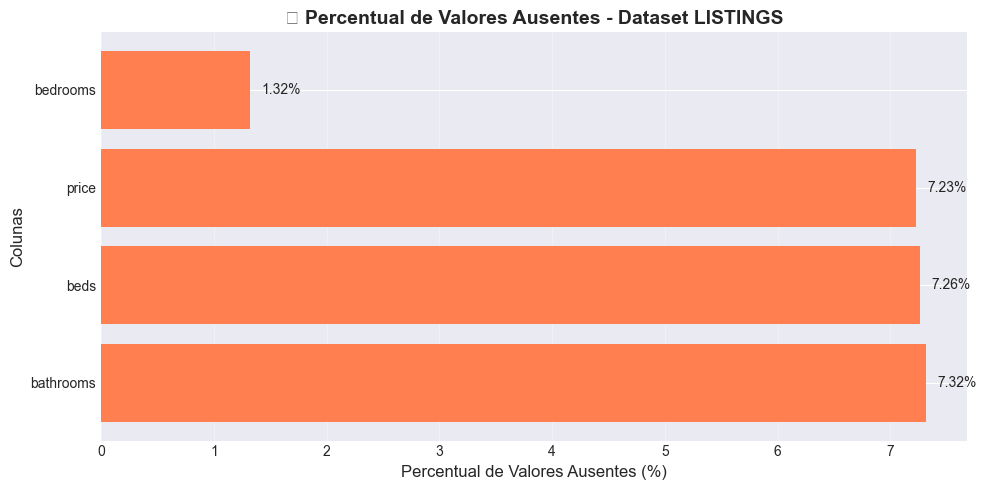

In [ ]:
# ====================================================================
# 2.1 IDENTIFICAÇÃO DE VALORES AUSENTES
# ====================================================================

print("=" * 70)
print("🔍 ANÁLISE DE VALORES AUSENTES - DATASET LISTINGS")
print("=" * 70)

# Contar valores nulos por coluna no dataset LISTINGS
missing_values_listings = listings.isnull().sum()

# Calcular percentual de valores nulos
missing_percent_listings = (listings.isnull().sum() / len(listings)) * 100

# Criar DataFrame com informações de valores ausentes
missing_df_listings = pd.DataFrame({
    "Coluna": missing_values_listings.index,
    "Valores Ausentes": missing_values_listings.values,
    "Percentual (%)": missing_percent_listings.values
})

# Filtrar apenas colunas com valores ausentes
missing_df_listings = missing_df_listings[missing_df_listings["Valores Ausentes"] > 0].sort_values(
    by="Valores Ausentes", ascending=False
).reset_index(drop=True)

print("\n📊 Resumo de Valores Ausentes (LISTINGS):\n")
display(missing_df_listings)

# Análise do dataset REVIEWS
print("\n" + "=" * 70)
print("🔍 ANÁLISE DE VALORES AUSENTES - DATASET REVIEWS")
print("=" * 70)

missing_values_reviews = reviews.isnull().sum()
missing_percent_reviews = (reviews.isnull().sum() / len(reviews)) * 100

missing_df_reviews = pd.DataFrame({
    "Coluna": missing_values_reviews.index,
    "Valores Ausentes": missing_values_reviews.values,
    "Percentual (%)": missing_percent_reviews.values
})

missing_df_reviews = missing_df_reviews[missing_df_reviews["Valores Ausentes"] > 0].sort_values(
    by="Valores Ausentes", ascending=False
).reset_index(drop=True)

if len(missing_df_reviews) > 0:
    print("\n📊 Resumo de Valores Ausentes (REVIEWS):\n")
    display(missing_df_reviews)
else:
    print("\n✅ Dataset REVIEWS não possui valores ausentes!")

# Visualização gráfica para LISTINGS
if len(missing_df_listings) > 0:
    plt.figure(figsize=(10, 5))
    plt.barh(missing_df_listings["Coluna"], missing_df_listings["Percentual (%)"], color="coral")
    plt.xlabel("Percentual de Valores Ausentes (%)", fontsize=12)
    plt.ylabel("Colunas", fontsize=12)
    plt.title("📊 Percentual de Valores Ausentes - Dataset LISTINGS", fontsize=14, fontweight="bold")
    plt.grid(axis="x", alpha=0.3)
    
    # Adicionar valores nas barras
    for index, value in enumerate(missing_df_listings["Percentual (%)"]):
        plt.text(value + 0.1, index, f"{value:.2f}%", va="center", fontsize=10)
    
    plt.tight_layout()
    plt.show()


In [ ]:
# ====================================================================
# 2.2 PREENCHIMENTO DE VALORES AUSENTES
# ====================================================================

print("=" * 70)
print("🔧 PREENCHIMENTO DE VALORES AUSENTES")
print("=" * 70)

# Criar cópia dos DataFrames para preservar os originais
listings_filled = listings.copy()

# -----------------------------------------------
# Estratégia de preenchimento:
# - bathrooms: mediana (pode ter outliers)
# - bedrooms: mediana (valores discretos)
# - beds: mediana (valores discretos)
# - price: mediana (distribuição assimétrica com outliers)
# -----------------------------------------------

# Preencher "bathrooms" com a mediana
bathrooms_median = listings_filled["bathrooms"].median()
listings_filled["bathrooms"].fillna(bathrooms_median, inplace=True)
print(f"\n🛁 \"bathrooms\" preenchido com mediana: {bathrooms_median}")

# Preencher "bedrooms" com a mediana
bedrooms_median = listings_filled["bedrooms"].median()
listings_filled["bedrooms"].fillna(bedrooms_median, inplace=True)
print(f"🛏️  \"bedrooms\" preenchido com mediana: {bedrooms_median}")

# Preencher "beds" com a mediana
beds_median = listings_filled["beds"].median()
listings_filled["beds"].fillna(beds_median, inplace=True)
print(f"🛌 \"beds\" preenchido com mediana: {beds_median}")

# Preencher "price" com a mediana
price_median = listings_filled["price"].median()
listings_filled["price"].fillna(price_median, inplace=True)
print(f"💰 \"price\" preenchido com mediana: R$ {price_median:.2f}")

# Verificar se ainda existem valores ausentes
print("\n" + "=" * 70)
print("✅ VERIFICAÇÃO FINAL DE VALORES AUSENTES")
print("=" * 70)
remaining_nulls = listings_filled.isnull().sum().sum()
print(f"\n📊 Total de valores ausentes restantes: {remaining_nulls}")

if remaining_nulls == 0:
    print("✅ Todos os valores ausentes foram tratados com sucesso!")
else:
    print(f"⚠️ Ainda existem {remaining_nulls} valores ausentes.")

# Realizar merge APÓS o preenchimento
print("\n" + "=" * 70)
print("🔗 REALIZANDO MERGE DOS DATASETS TRATADOS")
print("=" * 70)

df = pd.merge(listings_filled, reviews, on="id", how="inner")

print(f"\n📊 Dimensões do DataFrame combinado: {df.shape[0]} linhas x {df.shape[1]} colunas")
print("✅ Merge realizado com sucesso!")


🔧 PREENCHIMENTO DE VALORES AUSENTES

🛁 "bathrooms" preenchido com mediana: 1.0
🛏️  "bedrooms" preenchido com mediana: 1.0
🛌 "beds" preenchido com mediana: 2.0
💰 "price" preenchido com mediana: R$ 728.00

✅ VERIFICAÇÃO FINAL DE VALORES AUSENTES

📊 Total de valores ausentes restantes: 0
✅ Todos os valores ausentes foram tratados com sucesso!

🔗 REALIZANDO MERGE DOS DATASETS TRATADOS

📊 Dimensões do DataFrame combinado: 32695 linhas x 10 colunas
✅ Merge realizado com sucesso!


In [ ]:
# ====================================================================
# 2.3 MERGE DOS DATASETS (APÓS TRATAMENTO DE VALORES AUSENTES)
# ====================================================================

# Realizar merge usando a coluna "id" como chave
df = pd.merge(listings_filled, reviews, on="id", how="inner")

print("=" * 70)
print("🔗 MERGE REALIZADO COM SUCESSO!")
print("=" * 70)
print(f"\n📊 Dimensões do DataFrame combinado: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\n📋 Colunas disponíveis:")
print(df.columns.tolist())

print("\n" + "=" * 70)
print("👀 PRIMEIRAS 5 LINHAS DO DATAFRAME COMBINADO")
print("=" * 70)
display(df.head())


🔗 MERGE REALIZADO COM SUCESSO!

📊 Dimensões do DataFrame combinado: 32695 linhas x 10 colunas

📋 Colunas disponíveis:
['id', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating']

👀 PRIMEIRAS 5 LINHAS DO DATAFRAME COMBINADO


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000
